In [1]:
from pycaret.classification import *
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import sweetviz as sv
import numpy as np

import sys
sys.path.insert(1, '../utils')
from run_models.train_predict import train_model, calification_model



In [2]:
experiment_name = 'experiment_1_2'

## Preparar Datos

In [3]:
data = pd.read_csv(r"..\data\{}\pdmod_base_model.csv".format(experiment_name))
data.head()

,nit_enmascarado,num_oblig_enmascarado,num_oblig_orig_enmascarado,fecha_var_rpta_alt,f_cruce,sd_avg_dia_sld_cap_final,sd_max_dia_sld_cap_final,sd_min_sld_cap_final,sd_stddevpop_dia_sld_cap_final,sd_max_dia_nueva_altura_mora,sd_min_dia_nueva_altura_mora,sd_avg_dia_vlr_obligacion,sd_max_dia_vlr_obligacion,sd_min_dia_vlr_obligacion,sd_stddevpop_dia_vlr_obligacion,sd_avg_dia_vlr_vencido,sd_max_dia_vlr_vencido,sd_min_dia_vlr_vencido,sd_stddevpop_dia_vlr_vencido,mc_valor_cuota_mes,mc_pago_total,mc_porc_pago,mcd_total_ing,mcd_tot_activos,mcd_egresos_mes,mcd_tot_patrimonio,var_rpta_alt,pd_prob_propension,pd_prob_alrt_temprana,pd_prob_auto_cura
0,206107,416874,663468,202310,202309,1.913234e+07,19132341.79,19132341.79,0.000000e+00,15.0,0.0,1.970512e+07,19953951.0,19474893.0,1.407361e+05,3.048674e+05,573697.0,0.0,285184.637715,573391.0,0.0,0.0,7000000.0,84249000.0,3000000.0,81249000.0,1.0,0.909242,0.157584,0.778246
1,516641,285582,794760,202312,202311,2.700988e+07,30010981.00,0.00,9.003294e+06,57.0,28.0,2.934687e+07,33057961.0,1837490.0,9.198025e+06,2.920259e+06,3179267.0,1580725.0,532514.257419,1581692.0,0.0,0.0,21000000.0,220000000.0,7200000.0,220000000.0,1.0,0.616857,0.704380,0.168679
2,268533,474097,606245,202310,202309,1.514015e+06,1514015.00,1514015.00,0.000000e+00,17.0,0.0,1.545966e+06,1562344.0,1530415.0,8.759113e+03,2.987740e+04,52940.0,0.0,26127.151212,52552.0,0.0,0.0,3025000.0,44088000.0,300000.0,43788000.0,1.0,0.926218,0.196802,0.721480
3,599786,80392,999950,202312,202311,5.000000e+05,500000.00,500000.00,0.000000e+00,47.0,18.0,5.360467e+05,542393.0,529035.0,4.069038e+03,2.100027e+04,37079.0,0.0,18364.203480,37036.0,0.0,0.0,13073127.0,239119000.0,800000.0,239119000.0,0.0,0.652494,0.601985,0.550304
4,190304,476630,603712,202309,202308,2.200728e+07,22041612.66,21509424.95,1.307426e+05,57.0,0.0,2.293860e+07,23034558.0,22161291.0,1.482903e+05,8.537152e+05,919460.0,53245.0,184324.900802,919734.0,60165.0,7.0,1800000.0,38098000.0,400000.0,38098000.0,0.0,0.749377,0.793562,0.085022


In [4]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680800 entries, 0 to 680799
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   nit_enmascarado                  680800 non-null  int64  
 1   num_oblig_enmascarado            680800 non-null  int64  
 2   num_oblig_orig_enmascarado       680800 non-null  int64  
 3   fecha_var_rpta_alt               680800 non-null  int64  
 4   f_cruce                          680800 non-null  int64  
 5   sd_avg_dia_sld_cap_final         679517 non-null  float64
 6   sd_max_dia_sld_cap_final         679517 non-null  float64
 7   sd_min_sld_cap_final             679517 non-null  float64
 8   sd_stddevpop_dia_sld_cap_final   679517 non-null  float64
 9   sd_max_dia_nueva_altura_mora     679517 non-null  float64
 10  sd_min_dia_nueva_altura_mora     679517 non-null  float64
 11  sd_avg_dia_vlr_obligacion        679517 non-null  float64
 12  sd

In [5]:
# df_report = data[data["fecha_var_rpta_alt"] < 202401]
# df_report = df_report.drop(columns=["nit_enmascarado", "num_oblig_enmascarado", "fecha_var_rpta_alt"])
# report = sv.analyze([df_report, 'Train'], target_feat='var_rpta_alt')
# report.show_html('data_analysis/base_model_analysis.html')

In [6]:
vars_model = [
    "sd_avg_dia_sld_cap_final",
    "sd_stddevpop_dia_sld_cap_final",
    "sd_max_dia_nueva_altura_mora",
    "sd_min_dia_nueva_altura_mora",
    "sd_stddevpop_dia_vlr_obligacion",
    "sd_avg_dia_vlr_vencido",
    "sd_max_dia_vlr_vencido",
    "sd_min_dia_vlr_vencido",
    "sd_stddevpop_dia_vlr_vencido",
    "mc_valor_cuota_mes",
    "mc_pago_total"	,
    "mc_porc_pago"	,
    "mcd_total_ing"	,
    "mcd_tot_activos"	,
    "mcd_egresos_mes",
    "mcd_tot_patrimonio"	,
    "pd_prob_propension",
    "pd_prob_alrt_temprana",
    "pd_prob_auto_cura",
    "var_rpta_alt"
]

In [7]:
data_model = data[data["fecha_var_rpta_alt"] < 202401]
data_model = data_model[vars_model]

In [8]:
data_model.isna().sum()

sd_avg_dia_sld_cap_final           1088
sd_stddevpop_dia_sld_cap_final     1088
sd_max_dia_nueva_altura_mora       1088
sd_min_dia_nueva_altura_mora       1088
sd_stddevpop_dia_vlr_obligacion    1088
sd_avg_dia_vlr_vencido             1088
sd_max_dia_vlr_vencido             1088
sd_min_dia_vlr_vencido             1088
sd_stddevpop_dia_vlr_vencido       1088
mc_valor_cuota_mes                  984
mc_pago_total                       984
mc_porc_pago                       7583
mcd_total_ing                        10
mcd_tot_activos                      10
mcd_egresos_mes                      10
mcd_tot_patrimonio                   10
pd_prob_propension                 1888
pd_prob_alrt_temprana              1888
pd_prob_auto_cura                  1888
var_rpta_alt                          0
dtype: int64

In [9]:
(data_model < 0).sum()

sd_avg_dia_sld_cap_final           0
sd_stddevpop_dia_sld_cap_final     0
sd_max_dia_nueva_altura_mora       0
sd_min_dia_nueva_altura_mora       0
sd_stddevpop_dia_vlr_obligacion    0
sd_avg_dia_vlr_vencido             0
sd_max_dia_vlr_vencido             0
sd_min_dia_vlr_vencido             0
sd_stddevpop_dia_vlr_vencido       0
mc_valor_cuota_mes                 0
mc_pago_total                      0
mc_porc_pago                       0
mcd_total_ing                      0
mcd_tot_activos                    0
mcd_egresos_mes                    0
mcd_tot_patrimonio                 0
pd_prob_propension                 0
pd_prob_alrt_temprana              0
pd_prob_auto_cura                  0
var_rpta_alt                       0
dtype: int64

In [10]:
data_model = data_model.fillna(-99)

In [11]:
data_model.isna().sum()

sd_avg_dia_sld_cap_final           0
sd_stddevpop_dia_sld_cap_final     0
sd_max_dia_nueva_altura_mora       0
sd_min_dia_nueva_altura_mora       0
sd_stddevpop_dia_vlr_obligacion    0
sd_avg_dia_vlr_vencido             0
sd_max_dia_vlr_vencido             0
sd_min_dia_vlr_vencido             0
sd_stddevpop_dia_vlr_vencido       0
mc_valor_cuota_mes                 0
mc_pago_total                      0
mc_porc_pago                       0
mcd_total_ing                      0
mcd_tot_activos                    0
mcd_egresos_mes                    0
mcd_tot_patrimonio                 0
pd_prob_propension                 0
pd_prob_alrt_temprana              0
pd_prob_auto_cura                  0
var_rpta_alt                       0
dtype: int64

In [12]:

MM = MinMaxScaler()
data_model_norm = MM.fit_transform(data_model.drop(columns=["pd_prob_propension","pd_prob_alrt_temprana","pd_prob_auto_cura","var_rpta_alt"]))
data_model_norm = pd.DataFrame(data_model_norm, columns=data_model.columns[:-4])
data_model_norm.head()

,sd_avg_dia_sld_cap_final,sd_stddevpop_dia_sld_cap_final,sd_max_dia_nueva_altura_mora,sd_min_dia_nueva_altura_mora,sd_stddevpop_dia_vlr_obligacion,sd_avg_dia_vlr_vencido,sd_max_dia_vlr_vencido,sd_min_dia_vlr_vencido,sd_stddevpop_dia_vlr_vencido,mc_valor_cuota_mes,mc_pago_total,mc_porc_pago,mcd_total_ing,mcd_tot_activos,mcd_egresos_mes,mcd_tot_patrimonio
0,0.012321,8.026977e-07,0.065593,0.059424,0.001104,0.000729,0.001342,2.402792e-07,0.001596,0.001248,9.523388e-08,2.739924e-07,2.333363e-06,0.000009,5.000165e-07,0.000008
1,0.017394,7.300003e-02,0.089758,0.076230,0.072098,0.006982,0.007434,3.836759e-03,0.002980,0.003443,9.523388e-08,2.739924e-07,7.000023e-06,0.000024,1.200016e-06,0.000022
2,0.000975,8.026977e-07,0.066743,0.059424,0.000069,0.000072,0.000124,2.402792e-07,0.000147,0.000115,9.523388e-08,2.739924e-07,1.008365e-06,0.000005,5.001650e-08,0.000004
3,0.000322,8.026977e-07,0.084005,0.070228,0.000033,0.000050,0.000087,2.402792e-07,0.000103,0.000081,9.523388e-08,2.739924e-07,4.357736e-06,0.000027,1.333498e-07,0.000024
4,0.014172,1.060871e-03,0.089758,0.059424,0.001163,0.002041,0.002150,1.294692e-04,0.001032,0.002002,5.797146e-05,2.933656e-07,6.000322e-07,0.000004,6.668317e-08,0.000004


In [13]:
data_model_norm["pd_prob_propension"] = data_model["pd_prob_propension"].values
data_model_norm["pd_prob_alrt_temprana"] = data_model["pd_prob_alrt_temprana"].values
data_model_norm["pd_prob_auto_cura"] = data_model["pd_prob_auto_cura"].values
data_model_norm["var_rpta_alt"] = data_model["var_rpta_alt"].values
data_model_norm.head()

,sd_avg_dia_sld_cap_final,sd_stddevpop_dia_sld_cap_final,sd_max_dia_nueva_altura_mora,sd_min_dia_nueva_altura_mora,sd_stddevpop_dia_vlr_obligacion,sd_avg_dia_vlr_vencido,sd_max_dia_vlr_vencido,sd_min_dia_vlr_vencido,sd_stddevpop_dia_vlr_vencido,mc_valor_cuota_mes,mc_pago_total,mc_porc_pago,mcd_total_ing,mcd_tot_activos,mcd_egresos_mes,mcd_tot_patrimonio,pd_prob_propension,pd_prob_alrt_temprana,pd_prob_auto_cura,var_rpta_alt
0,0.012321,8.026977e-07,0.065593,0.059424,0.001104,0.000729,0.001342,2.402792e-07,0.001596,0.001248,9.523388e-08,2.739924e-07,2.333363e-06,0.000009,5.000165e-07,0.000008,0.909242,0.157584,0.778246,1.0
1,0.017394,7.300003e-02,0.089758,0.076230,0.072098,0.006982,0.007434,3.836759e-03,0.002980,0.003443,9.523388e-08,2.739924e-07,7.000023e-06,0.000024,1.200016e-06,0.000022,0.616857,0.704380,0.168679,1.0
2,0.000975,8.026977e-07,0.066743,0.059424,0.000069,0.000072,0.000124,2.402792e-07,0.000147,0.000115,9.523388e-08,2.739924e-07,1.008365e-06,0.000005,5.001650e-08,0.000004,0.926218,0.196802,0.721480,1.0
3,0.000322,8.026977e-07,0.084005,0.070228,0.000033,0.000050,0.000087,2.402792e-07,0.000103,0.000081,9.523388e-08,2.739924e-07,4.357736e-06,0.000027,1.333498e-07,0.000024,0.652494,0.601985,0.550304,0.0
4,0.014172,1.060871e-03,0.089758,0.059424,0.001163,0.002041,0.002150,1.294692e-04,0.001032,0.002002,5.797146e-05,2.933656e-07,6.000322e-07,0.000004,6.668317e-08,0.000004,0.749377,0.793562,0.085022,0.0


In [14]:
data_model_norm.isna().sum()

sd_avg_dia_sld_cap_final           0
sd_stddevpop_dia_sld_cap_final     0
sd_max_dia_nueva_altura_mora       0
sd_min_dia_nueva_altura_mora       0
sd_stddevpop_dia_vlr_obligacion    0
sd_avg_dia_vlr_vencido             0
sd_max_dia_vlr_vencido             0
sd_min_dia_vlr_vencido             0
sd_stddevpop_dia_vlr_vencido       0
mc_valor_cuota_mes                 0
mc_pago_total                      0
mc_porc_pago                       0
mcd_total_ing                      0
mcd_tot_activos                    0
mcd_egresos_mes                    0
mcd_tot_patrimonio                 0
pd_prob_propension                 0
pd_prob_alrt_temprana              0
pd_prob_auto_cura                  0
var_rpta_alt                       0
dtype: int64

In [15]:
# report = sv.analyze(data_model_norm, target_feat='var_rpta_alt')
# report.show_html('data_analysis/base_model_analysis_norm.html')

## Entrenar Modelo

In [16]:
best_model = train_model(data_model_norm, "var_rpta_alt", experiment_name)

,Description,Value
0,Session id,123
1,Target,var_rpta_alt
2,Target type,Binary
3,Original data shape,"(568251, 20)"
4,Transformed data shape,"(568251, 20)"
5,Transformed train set shape,"(397775, 20)"
6,Transformed test set shape,"(170476, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6732,0.7374,0.6309,0.6694,0.6496,0.3440,0.3445,1.7460
lightgbm,Light Gradient Boosting Machine,0.6667,0.7290,0.6207,0.6633,0.6413,0.3306,0.3313,1.7640
lr,Logistic Regression,0.6037,0.6402,0.5307,0.5983,0.5625,0.2027,0.2039,1.7380
svm,SVM - Linear Kernel,0.5755,0.6190,0.3837,0.5888,0.4644,0.1381,0.1469,1.3180


In [17]:
best_model = best_model[0]
print(best_model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


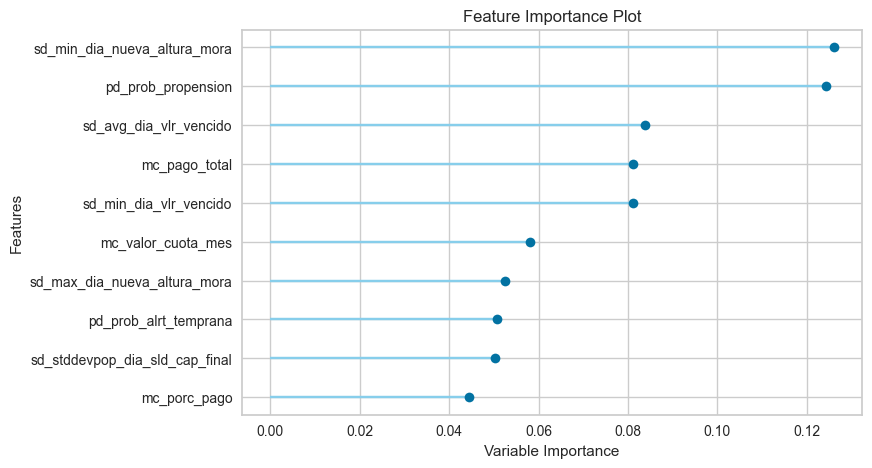

In [37]:
plot_model(best_model, plot='feature')

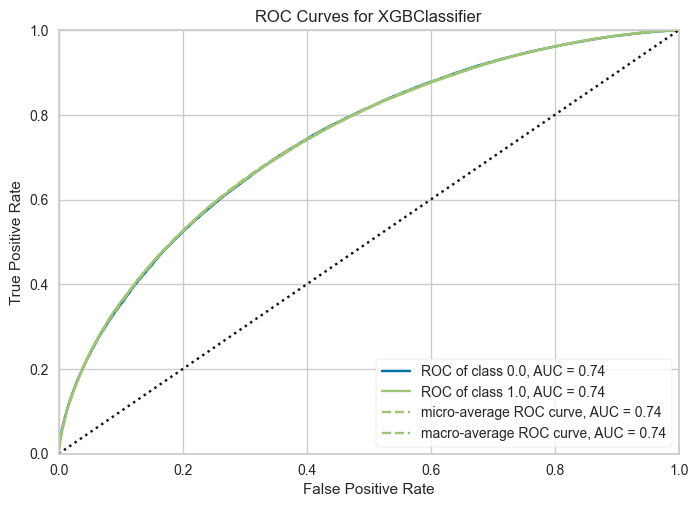

In [19]:

plot_model(best_model, plot = 'auc')

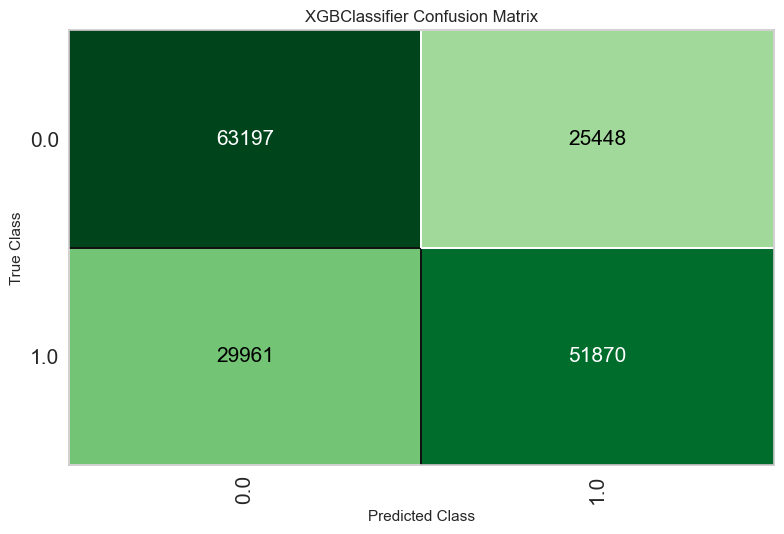

In [20]:
# functional API
plot_model(best_model, plot = 'confusion_matrix')

In [21]:
data_calification = data[data["fecha_var_rpta_alt"] == 202401]
data_calification.head()

,nit_enmascarado,num_oblig_enmascarado,num_oblig_orig_enmascarado,fecha_var_rpta_alt,f_cruce,sd_avg_dia_sld_cap_final,sd_max_dia_sld_cap_final,sd_min_sld_cap_final,sd_stddevpop_dia_sld_cap_final,sd_max_dia_nueva_altura_mora,...,mc_pago_total,mc_porc_pago,mcd_total_ing,mcd_tot_activos,mcd_egresos_mes,mcd_tot_patrimonio,var_rpta_alt,pd_prob_propension,pd_prob_alrt_temprana,pd_prob_auto_cura
9,32009,258911,821431,202401,202312,5206813.60,5206813.60,5206813.60,0.0,16.0,...,0.0,0.0,2101000.0,11120000.0,1299000.0,10730000.0,NaN,0.752607,0.300231,0.717270
16,438155,359990,720352,202401,202312,3202323.19,3202323.19,3202323.19,0.0,28.0,...,1053200.0,300.0,1136000.0,1186000.0,0.0,1186000.0,NaN,0.563261,0.621301,0.263560
25,154076,25957,1054385,202401,202312,1738280.00,1738280.00,1738280.00,0.0,79.0,...,0.0,0.0,1600000.0,43509000.0,500000.0,43509000.0,NaN,0.393355,0.709314,0.245149
29,383376,1032500,72554,202401,202312,399999.62,399999.62,399999.62,0.0,59.0,...,0.0,0.0,1000000.0,0.0,200000.0,0.0,NaN,0.401072,0.576111,0.307052
35,263716,433720,646622,202401,202312,15987194.63,15987194.63,15987194.63,0.0,56.0,...,378000.0,51.0,1741906.0,98409000.0,50000.0,98409000.0,NaN,0.349025,0.676928,0.217047


In [24]:
data_calification = calification_model(best_model, data_calification, vars_model, scaler = MM)
data_calification.head()

,nit_enmascarado,num_oblig_enmascarado,num_oblig_orig_enmascarado,fecha_var_rpta_alt,f_cruce,sd_avg_dia_sld_cap_final,sd_max_dia_sld_cap_final,sd_min_sld_cap_final,sd_stddevpop_dia_sld_cap_final,sd_max_dia_nueva_altura_mora,...,mc_porc_pago,mcd_total_ing,mcd_tot_activos,mcd_egresos_mes,mcd_tot_patrimonio,var_rpta_alt,pd_prob_propension,pd_prob_alrt_temprana,pd_prob_auto_cura,prediction_score_1
9,32009,258911,821431,202401,202312,5206813.60,5206813.60,5206813.60,0.0,16.0,...,0.0,2101000.0,11120000.0,1299000.0,10730000.0,1,0.752607,0.300231,0.717270,0.5960
16,438155,359990,720352,202401,202312,3202323.19,3202323.19,3202323.19,0.0,28.0,...,300.0,1136000.0,1186000.0,0.0,1186000.0,1,0.563261,0.621301,0.263560,0.5213
25,154076,25957,1054385,202401,202312,1738280.00,1738280.00,1738280.00,0.0,79.0,...,0.0,1600000.0,43509000.0,500000.0,43509000.0,0,0.393355,0.709314,0.245149,0.4487
29,383376,1032500,72554,202401,202312,399999.62,399999.62,399999.62,0.0,59.0,...,0.0,1000000.0,0.0,200000.0,0.0,0,0.401072,0.576111,0.307052,0.4096
35,263716,433720,646622,202401,202312,15987194.63,15987194.63,15987194.63,0.0,56.0,...,51.0,1741906.0,98409000.0,50000.0,98409000.0,0,0.349025,0.676928,0.217047,0.4397


In [25]:
data_calification["ID"] = data_calification["nit_enmascarado"].astype(str) + "#" + data_calification["num_oblig_orig_enmascarado"].astype(str) + "#" + data_calification["num_oblig_enmascarado"].astype(str)
new_dataframe = data_calification[["ID", "var_rpta_alt"]]
print(new_dataframe.isna().sum())

ID              0
var_rpta_alt    0
dtype: int64


In [28]:
new_dataframe.to_csv(r"..\data\{experiment}\pdmod_base_model_calification_{num_experiment}.csv".format(experiment = experiment_name, num_experiment = 2), index=False)

## Tunear Modelo

In [30]:
best_model_tuned = tune_model(best_model, fold=5)
print(best_model_tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5086,0.7372,0.9943,0.4941,0.6602,0.0525,0.1502
1,0.5094,0.7392,0.9944,0.4945,0.6605,0.0540,0.1529
2,0.5099,0.7405,0.9943,0.4948,0.6608,0.0550,0.1544
3,0.5079,0.7371,0.9947,0.4938,0.6599,0.0513,0.1490
4,0.5081,0.7401,0.9942,0.4938,0.6599,0.0515,0.1483
Mean,0.5088,0.7388,0.9944,0.4942,0.6603,0.0529,0.1510
Std,0.0008,0.0014,0.0002,0.0004,0.0003,0.0014,0.0023


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


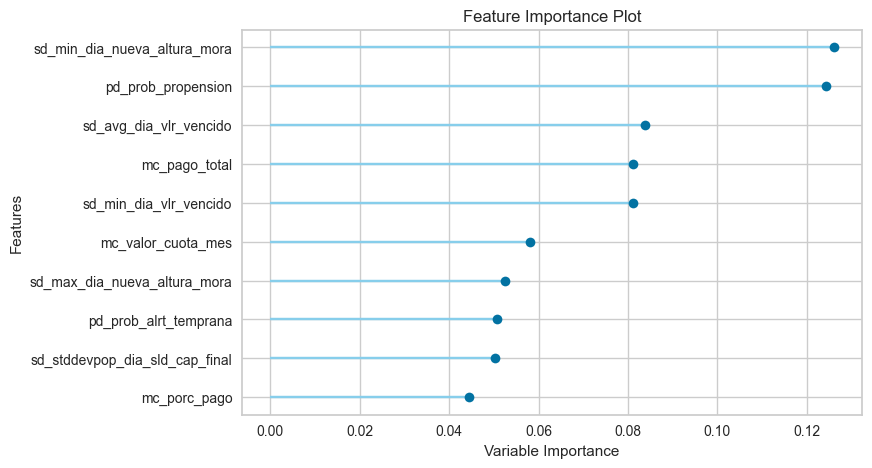

In [38]:
plot_model(best_model, plot='feature')

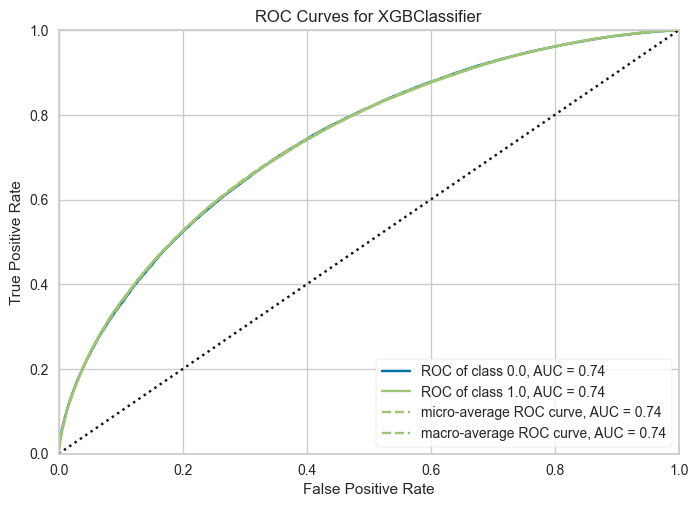

In [35]:
plot_model(best_model_tuned, plot = 'auc')

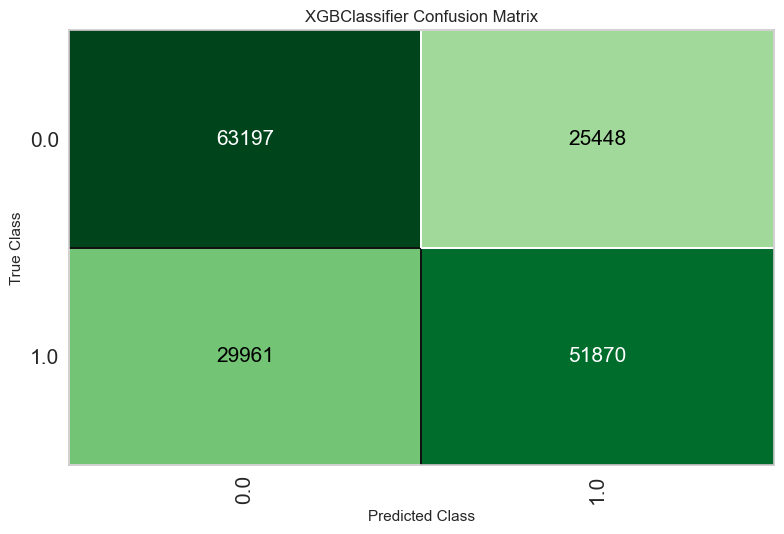

In [36]:
plot_model(best_model_tuned, plot = 'confusion_matrix')